### IMPORTING LIBRARIES

In [1]:
#importing libraries
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
#additionally
import sklearn.linear_model
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score,precision_recall_curve

### LOADING DATASET

In [6]:
df=pd.read_csv('Dataset.csv',sep=None)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
for i in  df.columns:
    print(df[i].value_counts()/len(df))

58    0.062706
57    0.056106
54    0.052805
59    0.046205
52    0.042904
60    0.039604
51    0.039604
56    0.036304
62    0.036304
44    0.036304
64    0.033003
41    0.033003
67    0.029703
63    0.029703
42    0.026403
43    0.026403
45    0.026403
53    0.026403
55    0.026403
61    0.026403
65    0.026403
50    0.023102
66    0.023102
48    0.023102
46    0.023102
47    0.016502
49    0.016502
70    0.013201
68    0.013201
35    0.013201
39    0.013201
69    0.009901
71    0.009901
40    0.009901
34    0.006601
37    0.006601
38    0.006601
29    0.003300
77    0.003300
74    0.003300
76    0.003300
Name: age, dtype: float64
1    0.679868
0    0.320132
Name: sex, dtype: float64
3    0.475248
2    0.283828
1    0.165017
0    0.075908
Name: cp, dtype: float64
120    0.122112
130    0.118812
140    0.105611
110    0.062706
150    0.056106
138    0.039604
128    0.039604
160    0.036304
125    0.036304
112    0.029703
132    0.026403
118    0.023102
124    0.019802
108    0.019802


In [11]:
X=df.drop(columns=['target'])
y=df.target

### CHECKING FOR NULL VALUES

In [12]:
# Check if there are any null values in the dataset:
if df.isnull().sum().sum() > 0:
    
    # Create a copy of the dataset
    df_copy = df.copy()
    
    # Create a new column to flag missing values
    for col in df.columns:
        df_copy[col+'_missing'] = np.where(df_copy[col].isnull(), 1, 0)
    
    # Calculate the percentage of missing values in each column
    pct_missing = df_copy.filter(like='_missing').sum() / len(df_copy)
    
    # Determine the type of missingness
    if pct_missing.max() == 1:
        print('The dataset contains only MNAR missing values.')
    elif pct_missing.max() < 1 and pct_missing.min() > 0:
        print('The dataset contains only MAR missing values.')
    elif pct_missing.max() < 1 and pct_missing.min() == 0:
        print('The dataset contains only CMAR missing values.')
    else:
        print('The dataset contains mixed types of missing values.')
else:
    print('The dataset does not contain any missing values.')


The dataset does not contain any missing values.


### SHAPIRO - WILKS TEST 

In [13]:
import pandas as pd
from scipy.stats import shapiro

# Get the list of column names
column_names = list(X.columns)

# Loop over each column and perform the Shapiro-Wilk test
for col_name in column_names:
    stat, p = shapiro(X[col_name])
    alpha = 0.05
    if p > alpha:
        print(col_name + ': Sample looks Gaussian (fail to reject H0)')
    else:
        print(col_name + ': Sample does not look Gaussian (reject H0)')


age: Sample does not look Gaussian (reject H0)
sex: Sample does not look Gaussian (reject H0)
cp: Sample does not look Gaussian (reject H0)
trestbps: Sample does not look Gaussian (reject H0)
chol: Sample does not look Gaussian (reject H0)
fbs: Sample does not look Gaussian (reject H0)
restecg: Sample does not look Gaussian (reject H0)
thalach: Sample does not look Gaussian (reject H0)
exang: Sample does not look Gaussian (reject H0)
oldpeak: Sample does not look Gaussian (reject H0)
slope: Sample does not look Gaussian (reject H0)
ca: Sample does not look Gaussian (reject H0)
thal: Sample does not look Gaussian (reject H0)


### CHECKING FOR DUPLICATED VALUES

In [14]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicate rows
df = df[~duplicates].drop_duplicates()

# Confirm no more duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0
Number of duplicate rows: 0


### CHECKING FOR OUTLIERS

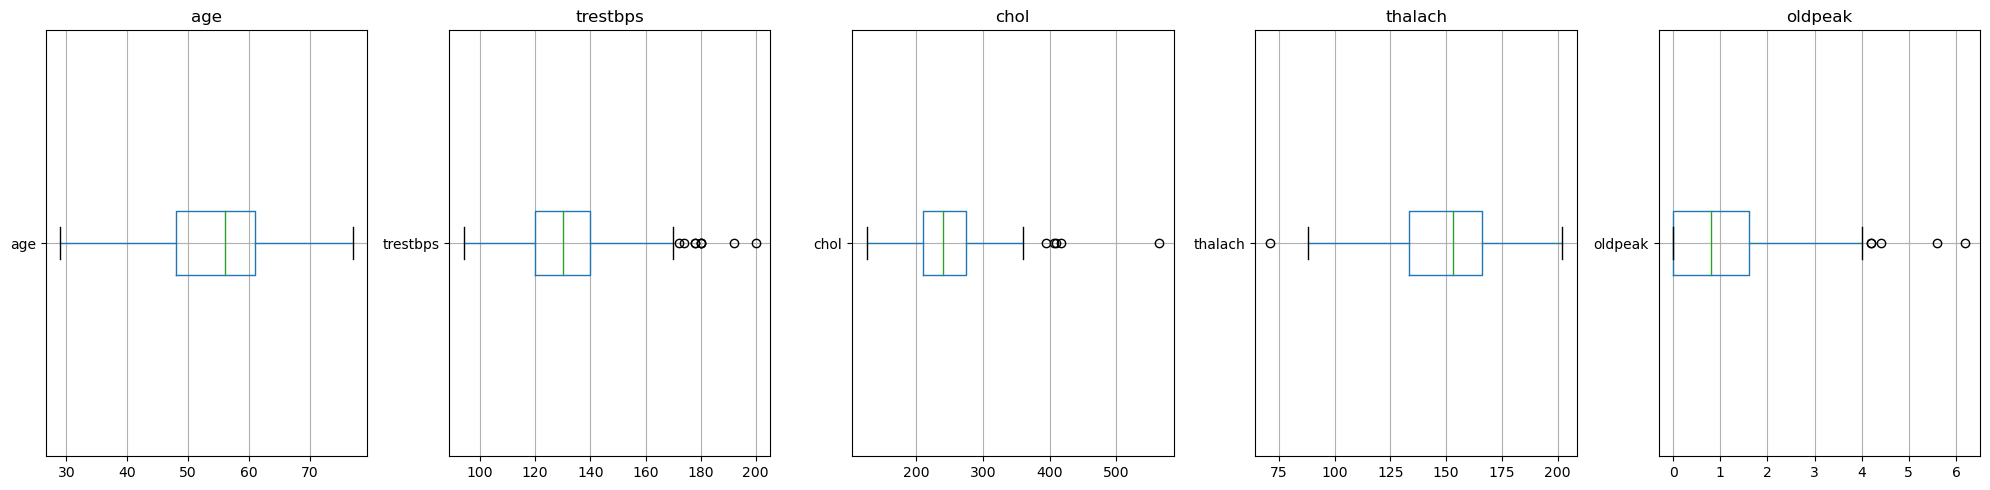

In [16]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create box plots for each numerical variable
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_cols), figsize=(20,5))
for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i], vert=False)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


Number of outliers in age: 0
Number of outliers in trestbps: 9
Number of outliers in chol: 5
Number of outliers in thalach: 1
Number of outliers in oldpeak: 5


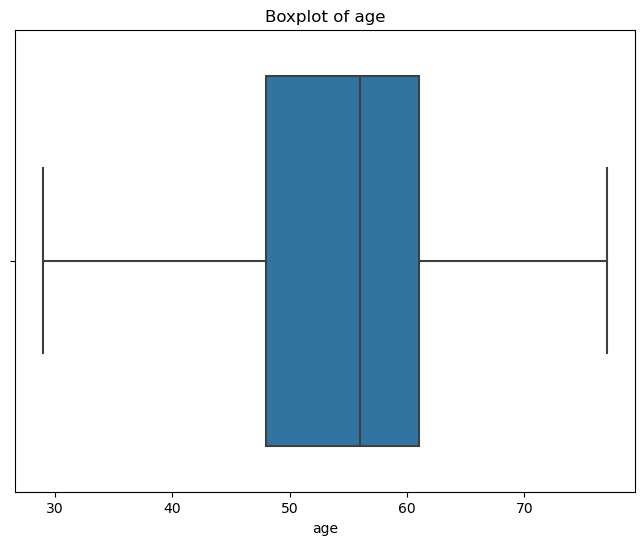

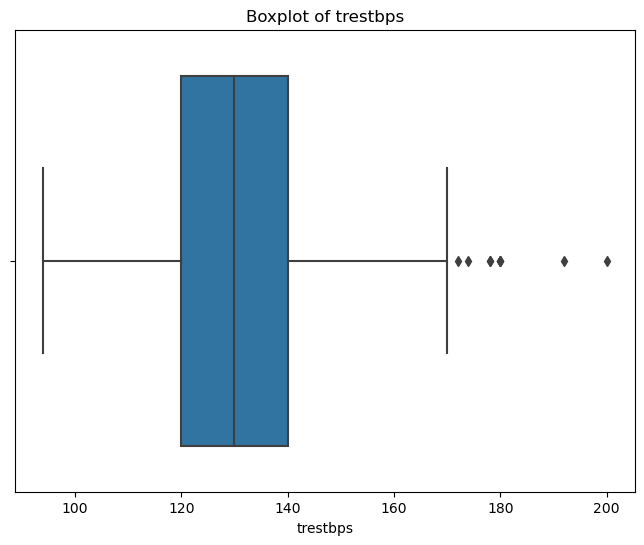

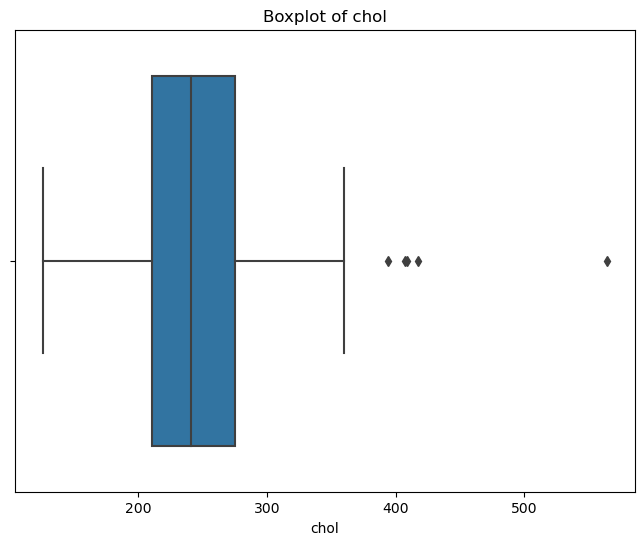

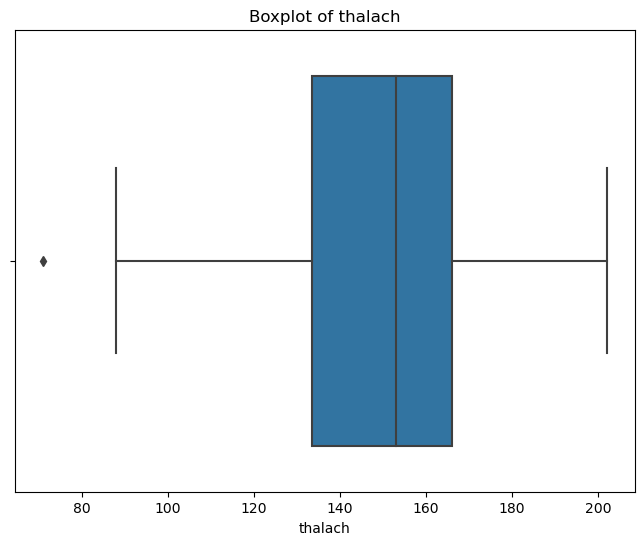

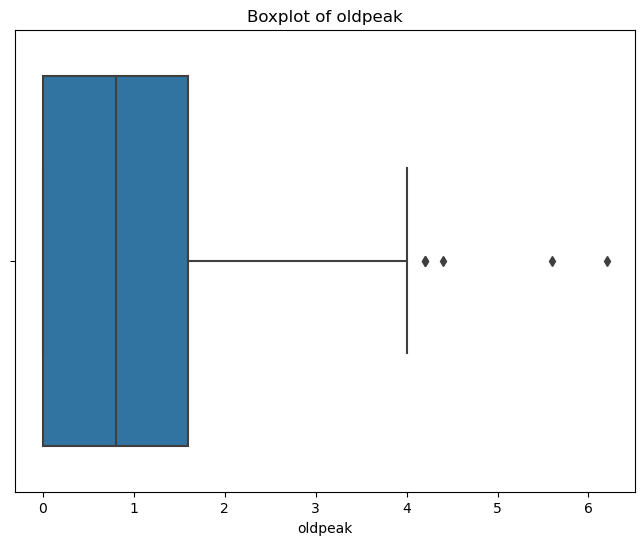

In [17]:
import seaborn as sns

# create a boxplot for each numerical feature
for col in numerical_cols :
    fig, ax = plt.subplots(figsize=(8,6))
    sns.boxplot(x=col, data=df, ax=ax)
    ax.set_title(f'Boxplot of {col}')
    
    # calculate the upper and lower bounds for outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    
    # count the number of outliers
    num_outliers = len(df[(df[col] > upper_bound) | (df[col] < lower_bound)])
    
    # print the number of outliers
    print(f"Number of outliers in {col}: {num_outliers}")


### CORRELATION MATRIX

<Axes: >

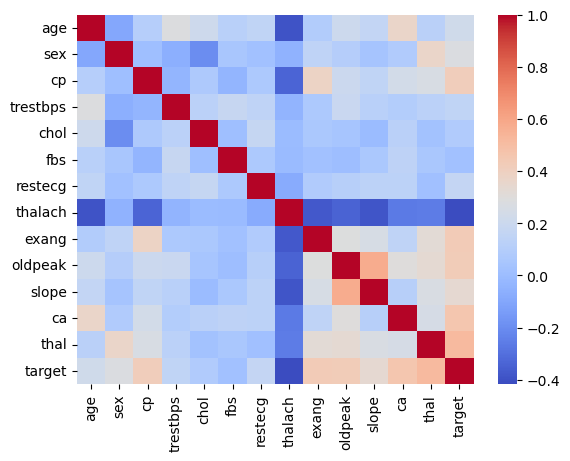

In [18]:
import pandas as pd
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap with colors
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)


### CHECKING DISTRIBUTION USING HISTOGRAM

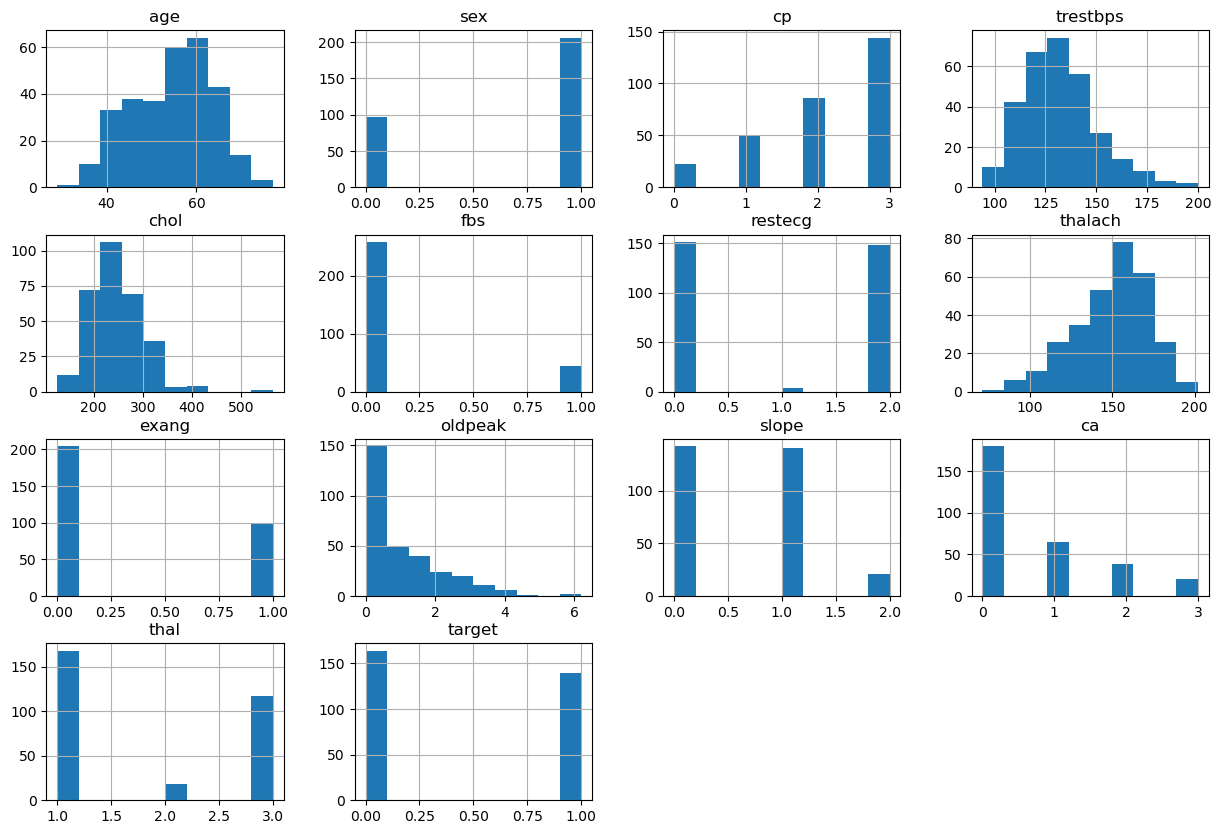

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



# Plot the histograms
df.hist(bins=10, figsize=(15,10))
plt.show()


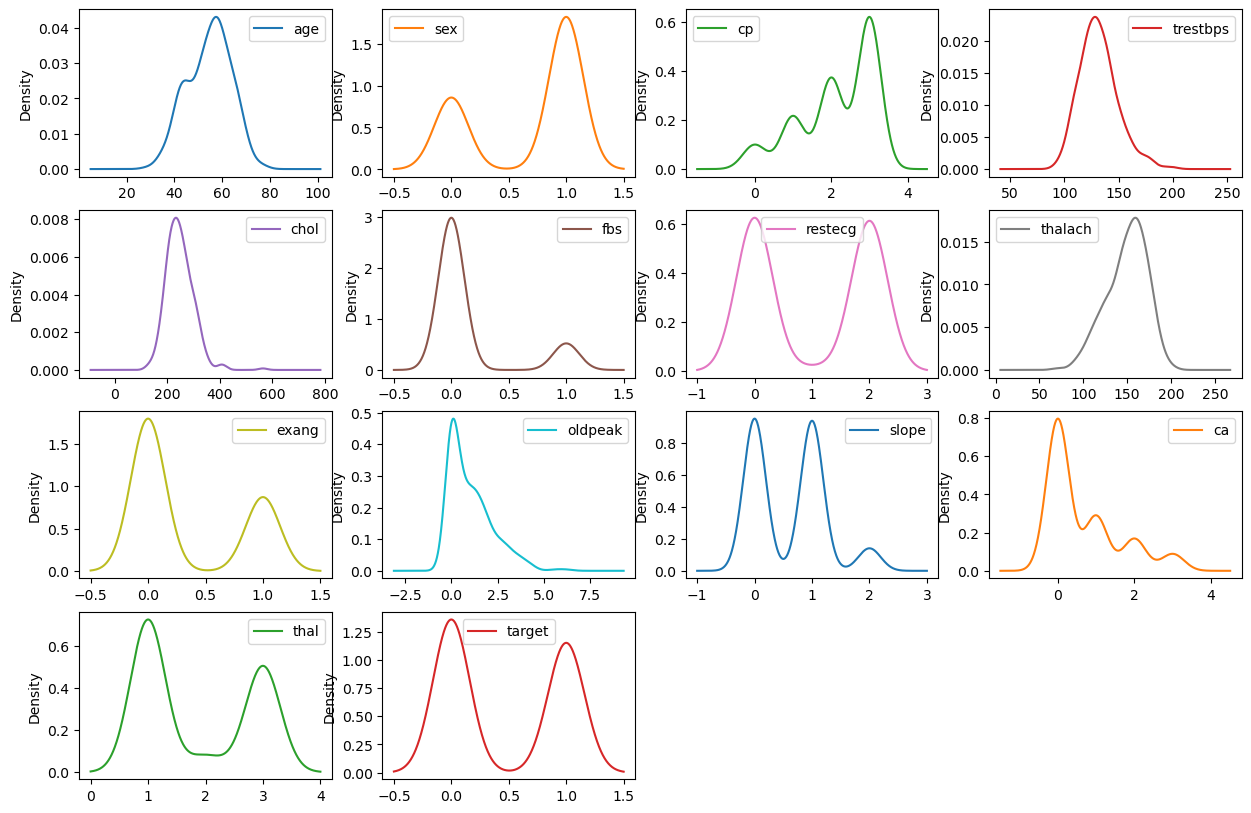

In [20]:
# Plot the density plots
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 10))
plt.show()


<Axes: xlabel='target', ylabel='count'>

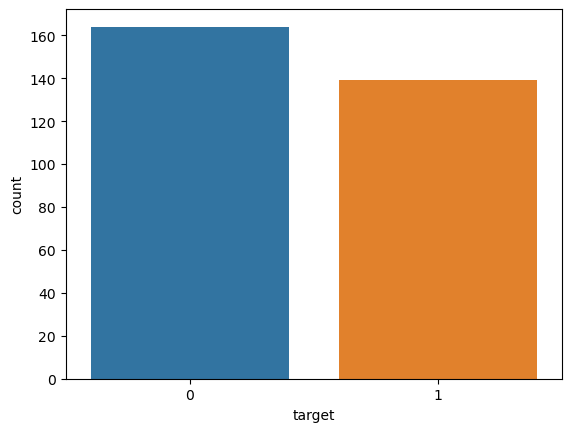

In [21]:
import seaborn as sns

sns.countplot(x='target', data=df)


### FITTING MODELS WITH ACTUAL DATA BEFORE PREPROCESSING

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [23]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Fit and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression accuracy:", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
print("....................................................................................................................")

# Fit and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print("Decision Tree accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))
print("....................................................................................................................")


# Fit and evaluate Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
print("....................................................................................................................")


# Fit and evaluate XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print("XGBoost accuracy:", accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))
print("....................................................................................................................")


Logistic Regression accuracy: 0.9180327868852459
[[27  2]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

....................................................................................................................
Decision Tree accuracy: 0.7540983606557377
[[23  6]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.79      0.72      0.75        32

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61

...................................................................................................

### K FOLD CROSS VALIDATION

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# define features and target variable
X = df.drop('target', axis=1)
y = df['target']

# initialize models
models = [LogisticRegression(),DecisionTreeClassifier(), RandomForestClassifier(),SVC(),AdaBoostClassifier(),BaggingClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier()]

# loop through models and perform cross-validation
for model in models:
    scores = cross_val_score(model, X, y, cv=10)
    y_pred = model.fit(X, y).predict(X)
    print(f"Model: {model.__class__.__name__}, Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")
    print(classification_report(y, y_pred))
    print("**************************************************************************************************************")


Model: LogisticRegression, Accuracy: 0.83 (+/- 0.08)
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       164
           1       0.88      0.80      0.84       139

    accuracy                           0.86       303
   macro avg       0.86      0.85      0.86       303
weighted avg       0.86      0.86      0.86       303

**************************************************************************************************************
Model: DecisionTreeClassifier, Accuracy: 0.75 (+/- 0.10)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       139

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303

**************************************************************************************************************
Model: RandomF

### ANOVA TEST

In [25]:
from sklearn.feature_selection import f_classif

# Load the data and split into predictor and target variables
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
y = df['target']

# Perform the ANOVA test
f_values, p_values = f_classif(X, y)

# Print the results with hypotheses
for i, feature in enumerate(X.columns):
    print("Feature:", feature)
    print("F-value:", f_values[i])
    print("P-value:", p_values[i])
    if p_values[i] < 0.05:
        print("Reject null hypothesis: The mean values of {} are not equal for different target groups".format(feature))
        print("it is significant feature")
    else:
        print("Fail to reject null hypothesis: The mean values of {} are equal for different target groups".format(feature))
    print("\n")


Feature: age
F-value: 15.769637007270576
P-value: 8.95563691752478e-05
Reject null hypothesis: The mean values of age are not equal for different target groups
it is significant feature


Feature: trestbps
F-value: 7.006632276708438
P-value: 0.008548268928585812
Reject null hypothesis: The mean values of trestbps are not equal for different target groups
it is significant feature


Feature: chol
F-value: 2.199054444279607
P-value: 0.1391416702043342
Fail to reject null hypothesis: The mean values of chol are equal for different target groups


Feature: thalach
F-value: 63.419222517507656
P-value: 3.4569649084312953e-14
Reject null hypothesis: The mean values of thalach are not equal for different target groups
it is significant feature


Feature: oldpeak
F-value: 66.16670679090825
P-value: 1.0976053396984379e-14
Reject null hypothesis: The mean values of oldpeak are not equal for different target groups
it is significant feature




In [26]:
### except cholestrol ,everything is significant

### CHECKING FOR MULTICOLLINEARITY USING VARIANCE INFLATION FACTOR

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif

# Input for numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate VIF for numerical columns
vif_numerical = calculate_vif(df, numerical_cols)
print(vif_numerical)


   Features        VIF
0       age  36.685632
1  trestbps  55.971579
2      chol  24.354973
3   thalach  29.326738
4   oldpeak   2.084119


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif

# Input for numerical columns
numerical_cols = ['age',  'chol', 'thalach', 'oldpeak']

# Calculate VIF for numerical columns
vif_numerical = calculate_vif(df, numerical_cols)
print(vif_numerical)


  Features        VIF
0      age  24.663117
1     chol  23.851692
2  thalach  19.841319
3  oldpeak   1.969897


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif

# Input for numerical columns
numerical_cols = [  'chol', 'thalach', 'oldpeak']

# Calculate VIF for numerical columns
vif_numerical = calculate_vif(df, numerical_cols)
print(vif_numerical)


  Features        VIF
0     chol  17.141054
1  thalach  15.740877
2  oldpeak   1.789575


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, features):
    vif = pd.DataFrame()
    vif["Features"] = features
    vif["VIF"] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif

# Input for numerical columns
numerical_cols = ['thalach', 'oldpeak']

# Calculate VIF for numerical columns
vif_numerical = calculate_vif(df, numerical_cols)
print(vif_numerical)


  Features       VIF
0  thalach  1.629314
1  oldpeak  1.629314


### CRAMERS V TEST

In [31]:
categorical_list=['cp','restecg','slope','ca','thal','sex','target','fbs','exang']

In [32]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [33]:
for i in categorical_list:
    print(i,cramers_V(df[i],df['target']))

cp 0.27001904381695757
restecg 0.033173403870119
slope 0.15110426111679734
ca 0.23965969122598635
thal 0.2728863009833356
sex 0.07274772477279033
target 0.9867523624439674
fbs 0.00025443910328345424
exang 0.18048328227987587


In [34]:
df1=df.drop(columns=['restecg','sex','fbs','age','trestbps','chol'])

In [35]:
df1=pd.get_dummies(df1,columns=['cp','slope','ca','thal'])

In [36]:
df1.columns

Index(['thalach', 'exang', 'oldpeak', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

### MODELS FITTED AFTER  ONE HOT ENCODING 

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# define features and target variable
X1 = df1.drop('target', axis=1)
y1 = df1['target']

# initialize models
models = [LogisticRegression(),DecisionTreeClassifier(), RandomForestClassifier(),SVC(),AdaBoostClassifier(),BaggingClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),StackingClassifier(
        estimators=[('rf', RandomForestClassifier()), 
                    ('et', ExtraTreesClassifier())]
    )]

# loop through models and perform cross-validation
for model in models:
    scores = cross_val_score(model, X1, y1, cv=10)
    y_pred1 = model.fit(X1, y1).predict(X1)
    print(classification_report(y1, y_pred1))
    print(f"Model: {model.__class__.__name__}, Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")
    
    print("**************************************************************************************************************")


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       164
           1       0.90      0.80      0.84       139

    accuracy                           0.86       303
   macro avg       0.87      0.86      0.86       303
weighted avg       0.87      0.86      0.86       303

Model: LogisticRegression, Accuracy: 0.85 (+/- 0.07)
**************************************************************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       139

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303

Model: DecisionTreeClassifier, Accuracy: 0.77 (+/- 0.05)
**************************************************************************************************************
              

### OPTIMIZATION FOR LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

lr_model = LogisticRegression(random_state=20)

# Define hyperparameter grid to search over
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1, 10, 100],
              'solver': ['liblinear', 'saga']}

# Create grid search object
grid_search = GridSearchCV(lr_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search object to data
grid_search.fit(X1, y1)

# Print best hyperparameters and corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score:  0.8513114754098361


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report

# Set the hyperparameters
C = 0.1
penalty = 'l2'
solver = 'liblinear'

# Initialize the logistic regression model with the best hyperparameters
lr_model_t = LogisticRegression(C=C, penalty=penalty, solver=solver,random_state=40)


# Set up k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

# Compute the cross-validation predictions
cv_predictions = cross_val_predict(lr_model_t, X1, y1, cv=kf)


# Compute the cross-validation scores
cv_scores = cross_val_score(lr_model_t, X1, y1, cv=kf)

# Compute the classification report
target_names = ['class 0', 'class 1']
report = classification_report(y1, cv_predictions, target_names=target_names)

# Print the classification report
print(report)

# Print the average cross-validation score
print("Average cross-validation score: {:.4f}".format(cv_scores.mean()))


              precision    recall  f1-score   support

     class 0       0.82      0.91      0.86       164
     class 1       0.88      0.76      0.82       139

    accuracy                           0.84       303
   macro avg       0.85      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303

Average cross-validation score: 0.8448


### OPTIMIZATION FOR DECISION TREE :PRUNING 

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# create decision tree classifier object
dt_clf = DecisionTreeClassifier(random_state=40)

# define parameter grid for tuning
param_grid = {"max_depth": np.arange(1, 10),
              "ccp_alpha": np.linspace(0, 1, 50)}

# create GridSearchCV object
grid_search = GridSearchCV(dt_clf, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(X1, y1)

# select the best decision tree classifier model from the GridSearchCV results
best_dt_clf = grid_search.best_estimator_

# print the best hyperparameters and the corresponding model accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best model accuracy: ", grid_search.best_score_)


Best hyperparameters:  {'ccp_alpha': 0.0, 'max_depth': 3}
Best model accuracy:  0.8148087431693989


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report

# Set the hyperparameters
ccp_alpha = 0.0
max_depth = 3

# Initialize the decision tree model with the hyperparameters
dt_model_p = DecisionTreeClassifier(ccp_alpha=ccp_alpha, max_depth=max_depth,random_state=40)

# Set up k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

# Compute the cross-validation predictions
cv_predictions = cross_val_predict(dt_model_p, X1, y1, cv=kf)

# Compute the cross-validation scores
cv_scores = cross_val_score(dt_model_p, X1, y1, cv=kf)

# Compute the classification report
target_names = ['class 0', 'class 1']
report = classification_report(y1, cv_predictions, target_names=target_names)

# Print the classification report
print(report)

# Print the average cross-validation score
print("Average cross-validation score: {:.4f}".format(cv_scores.mean()))

              precision    recall  f1-score   support

     class 0       0.80      0.82      0.81       164
     class 1       0.79      0.76      0.77       139

    accuracy                           0.80       303
   macro avg       0.79      0.79      0.79       303
weighted avg       0.80      0.80      0.80       303

Average cross-validation score: 0.8154


In [46]:
    from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Define a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=40)

# Train the classifier on the training data
rf.fit(X1, y1)

# Make predictions on the test data
y_pred2 = rf.predict(X1)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y1, y_pred2)
print("Accuracy:", accuracy)

# Print the classification report and confusion matrix
print(classification_report(y1, y_pred2))
print(confusion_matrix(y1, y_pred2))
print("*****************************************************************************************************************")

# Perform model pruning by setting the maximum depth of the trees to 3
rf_pruned = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_pruned.fit(X1, y1)

# Make predictions on the pruned model
y_pred_pruned = rf_pruned.predict(X1)

# Calculate the accuracy of the pruned model
accuracy_pruned = accuracy_score(y1, y_pred_pruned)
print("Accuracy after pruning:", accuracy_pruned)

# Print the classification report and confusion matrix of the pruned model
print(classification_report(y1, y_pred_pruned))
print(confusion_matrix(y1, y_pred_pruned))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00       139

    accuracy                           1.00       303
   macro avg       1.00      1.00      1.00       303
weighted avg       1.00      1.00      1.00       303

[[164   0]
 [  0 139]]
*****************************************************************************************************************
Accuracy after pruning: 0.8613861386138614
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       164
           1       0.90      0.78      0.84       139

    accuracy                           0.86       303
   macro avg       0.87      0.86      0.86       303
weighted avg       0.87      0.86      0.86       303

[[152  12]
 [ 30 109]]


### OPTIMIZATION FOR SUPPORT VECTOR CLASSIFIER

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the parameter grid for the AdaBoost classifier
param_grid = {'n_estimators': [10, 200, 300, 50],
              'learning_rate': [0.1, 0.5, 1, 2],
              'algorithm': ['SAMME', 'SAMME.R']}

# Initialize the AdaBoost classifier
ada_model = AdaBoostClassifier(random_state=20)

# Set up grid search
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, n_jobs=-1)


# Fit the grid search to the data
grid_search.fit(X1, y1)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best hyperparameters: ', best_params)

# Compute the cross-validation score
cv_score = grid_search.best_score_



# Print the cross-validation score
print('Best model accuracy: ', cv_score)

# Initialize the AdaBoost classifier with the best hyperparameters
ada_model_f = AdaBoostClassifier(**best_params)

# Set up k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

# Compute the cross-validation predictions
cv_predictions = cross_val_predict(ada_model_f, X1, y1, cv=kf)
# Compute the cross-validation scores
cv_scores = cross_val_score(ada_model_f, X1, y1, cv=kf)

# Compute the classification report
target_names = ['class 0', 'class 1']
report = classification_report(y1, cv_predictions, target_names=target_names)

# Print the classification report
print(report)

# Print the average cross-validation score
print("Average cross-validation score: {:.4f}".format(cv_scores.mean()))

Best hyperparameters:  {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 10}
Best model accuracy:  0.8513114754098361
              precision    recall  f1-score   support

     class 0       0.83      0.88      0.85       164
     class 1       0.84      0.78      0.81       139

    accuracy                           0.83       303
   macro avg       0.84      0.83      0.83       303
weighted avg       0.84      0.83      0.83       303

Average cross-validation score: 0.8220


### OPTIMIZATION FOR BAGGING CLASSIFIER

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

# Set the parameter grid for the BaggingClassifier
param_grid = {'n_estimators': [5,10,15,20],
              'max_samples': [0.1, 0.5, 1.0],
              'max_features': [0.1, 0.5, 1.0],
              'bootstrap': [True, False],
              'bootstrap_features': [True, False]}

# Initialize the BaggingClassifier
bag_model = BaggingClassifier(random_state=20)

# Set up grid search
grid_search = GridSearchCV(estimator=bag_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X1, y1)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best hyperparameters: ', best_params)

# Compute the cross-validation score
cv_score = grid_search.best_score_

# Print the cross-validation score
print('Best model accuracy: ', cv_score)

# Initialize the BaggingClassifier with the best hyperparameters
bag_model_f = BaggingClassifier(**best_params)

# Set up k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

# Compute the cross-validation predictions
cv_predictions = cross_val_predict(bag_model_f, X1, y1, cv=kf)

# Compute the cross-validation scores
cv_scores = cross_val_score(bag_model_f, X1, y1, cv=kf)

# Compute the classification report
target_names = ['class 0', 'class 1']
report = classification_report(y1, cv_predictions, target_names=target_names)

# Print the classification report
print(report)

# Print the average cross-validation score
print("Average cross-validation score: {:.4f}".format(cv_scores.mean()))


Best hyperparameters:  {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 15}
Best model accuracy:  0.838087431693989
              precision    recall  f1-score   support

     class 0       0.79      0.82      0.81       164
     class 1       0.78      0.74      0.76       139

    accuracy                           0.79       303
   macro avg       0.78      0.78      0.78       303
weighted avg       0.79      0.79      0.78       303

Average cross-validation score: 0.8120


### OPTIMIZATION FOR GRADIENT BOOSTING CLASSIFIER

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report

# Set the parameter grid for the Gradient Boosting classifier
param_grid = {'n_estimators': [5, 10, 20, 30],
              'learning_rate': [0.01, 0.1, 0.5, 1],
              'max_depth': [2, 3, 4, 5]}

# Initialize the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=20)

# Set up grid search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X1, y1)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best hyperparameters: ', best_params)

# Compute the cross-validation score
cv_score = grid_search.best_score_

# Print the cross-validation score
print('Best model accuracy: ', cv_score)

# Initialize the Gradient Boosting classifier with the best hyperparameters
gb_model_f = GradientBoostingClassifier(**best_params,random_state=20)

# Set up k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True)

# Compute the cross-validation predictions
cv_predictions = cross_val_predict(gb_model_f, X1, y1, cv=kf)

# Compute the cross-validation scores
cv_scores = cross_val_score(gb_model_f, X1, y1, cv=kf)

# Compute the classification report
target_names = ['class 0', 'class 1']
report = classification_report(y1, cv_predictions, target_names=target_names)

# Print the classification report
print(report)

# Print the average cross-validation score
print("Average cross-validation score: {:.4f}".format(cv_scores.mean()))


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10}
Best model accuracy:  0.834808743169399
              precision    recall  f1-score   support

     class 0       0.79      0.90      0.84       164
     class 1       0.85      0.71      0.78       139

    accuracy                           0.81       303
   macro avg       0.82      0.80      0.81       303
weighted avg       0.82      0.81      0.81       303

Average cross-validation score: 0.8053


### OPTIMIZATION FOR STACKING CLASSIFIER

In [68]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import pandas as pd

# Split the data into features and target
X1 = df1.drop(columns=['target'])
y1 = df1['target']

# Define the estimators for the stacking ensemble
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC()),
    ('ada', AdaBoostClassifier()),
    ('bag', BaggingClassifier()),
    ('et', ExtraTreesClassifier()),
    ('gb', GradientBoostingClassifier())
]

# Initialize the stacking classifier
stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Set up k-fold cross-validation
k = 6
kf = KFold(n_splits=k, shuffle=True)

# Compute the cross-validation predictions
cv_predictions = cross_val_predict(stacked_model, X1, y1, cv=kf)
# Compute the cross-validation scores
cv_scores = cross_val_score(stacked_model, X1, y1, cv=kf)

# Compute the classification report
target_names = ['class 0', 'class 1']
report = classification_report(y1, cv_predictions, target_names=target_names)

# Print the classification report
print(report)

# Print the average cross-validation score
print("Average cross-validation score: {:.4f}".format(cv_scores.mean()))


              precision    recall  f1-score   support

     class 0       0.82      0.86      0.84       164
     class 1       0.82      0.77      0.80       139

    accuracy                           0.82       303
   macro avg       0.82      0.81      0.82       303
weighted avg       0.82      0.82      0.82       303

Average cross-validation score: 0.8253
